# TP2: Modelo neuronal de Izhikevich

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulation parameters
dt = 0.1  # Time step (ms)
T = 250  # Total simulation time (ms)
initial_time = 25 #Initial time (ms)
time = np.arange(0, T+dt, dt) # step values [ms]

In [3]:
def Izhikevich_Model(parameters):

    #Voltage
    V = np.zeros_like(time)
    V[0] = parameters[5]  # Membrane initial potential (mV)
    voltage_threshold = 30.0 #Voltage threshold (mV)

    #Recovery
    u = np.zeros_like(time)
    u[0] = parameters[1] * V[0]#-14

    for t in range(1, len(time)):
        # If spike is not reached
        if V[t-1] < voltage_threshold:
            # ODE for membrane potential
            dV      = (0.04 * V[t-1] + 5) * V[t-1] + 140 - u[t-1] + parameters[4][t-1]
            V[t]    = V[t-1] + dV * dt
            # ODE for recovery variable
            du      = parameters[0] * (parameters[1] * V[t-1] - u[t-1])
            u[t]    = u[t-1] + du * dt
        # If spike is reached
        else:
            V[t-1] = voltage_threshold      # set to voltage_threshold
            V[t] = parameters[2]            # reset membrane voltage
            u[t] = u[t-1] + parameters[3]   # reset recovery
    
    return time, V

def plot_results(time, voltage_values, current_values, title):
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10,8))
    fig.suptitle(title)
    fig.tight_layout()

    ax0.plot(time, voltage_values, label='Tensión de Membrana')
    ax0.set_xlabel('Tiempo (ms)')
    ax0.set_ylabel('Potencial de Membrana (mV)')
    ax0.grid()
    ax0.legend()

    ax1.plot(time, current_values, label='Corriente de polarización', c='orange')
    ax1.set_xlabel('Tiempo (ms)')
    ax1.set_ylabel('Corriente de entrada (nA)')
    ax1.grid()
    ax1.legend(loc='lower right')

    plt.show()

def I_values(initial_time, T, dt, kind):
    if kind == 'RZ':
        I = np.zeros(len(time))
        I[int(initial_time/dt):int(T/dt)] = .2
        I[int((initial_time/dt)*5 + 200): int((initial_time/dt)*5 + 250)] = 1.0
    elif kind == 'TC1':
        I = np.zeros(len(time))
        I[int(initial_time/dt):int(T/dt)] = 1.0#2.5
    elif kind == 'TC2':
        I = np.zeros(len(time))
        I[:int(initial_time/dt)] = -30.0
    else:
        I = np.zeros(len(time))
        I[int(initial_time/dt):int(T/dt)] = 10.0
    return I

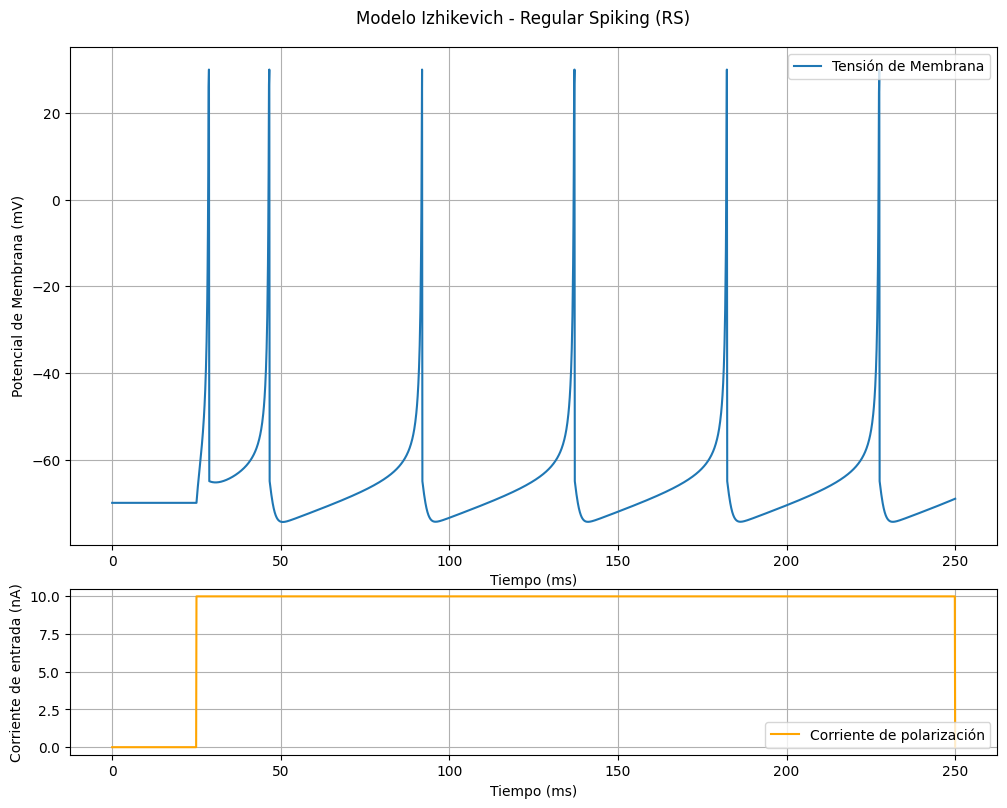

In [102]:
# Izhikevich neuron model Regular Spiking (RS) parameters
I = I_values(initial_time, T, dt, kind='RS')
parameters = [0.02, 0.2, -65.0, 8.0, I, -70.0] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Regular Spiking (RS)')

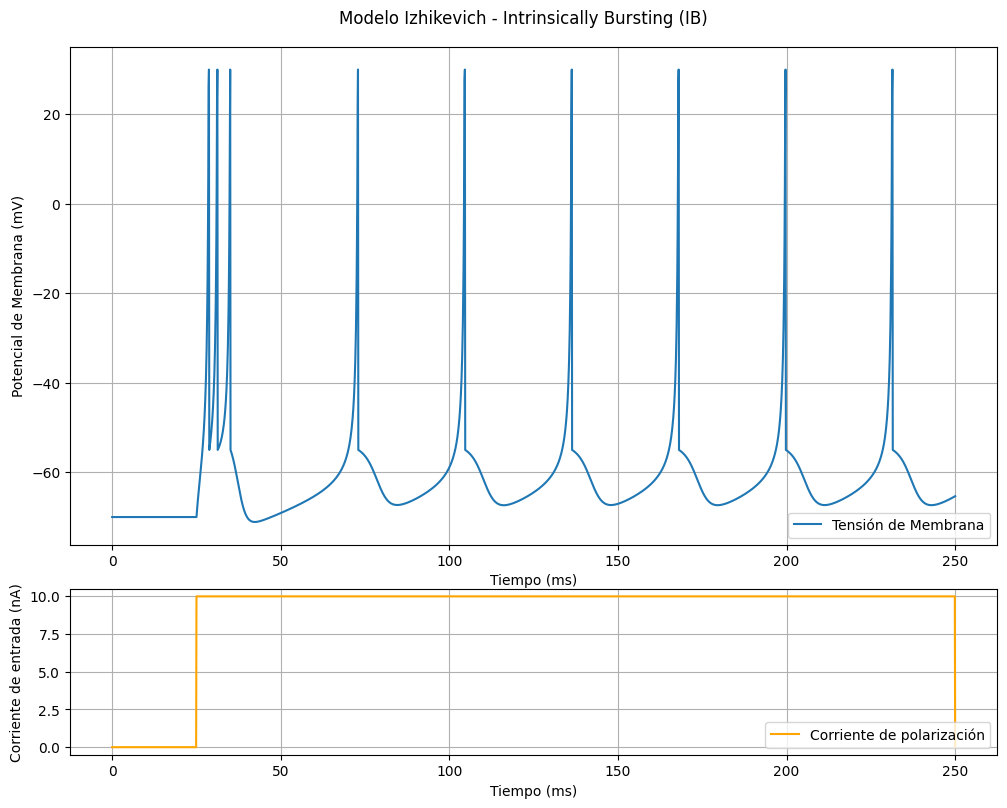

In [103]:
# Izhikevich neuron model Intrinsically Bursting (IB) parameters
I = I_values(initial_time, T, dt, kind='IB')
parameters = [0.02, 0.2, -55.0, 4.0, I, -70.0] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Intrinsically Bursting (IB)')

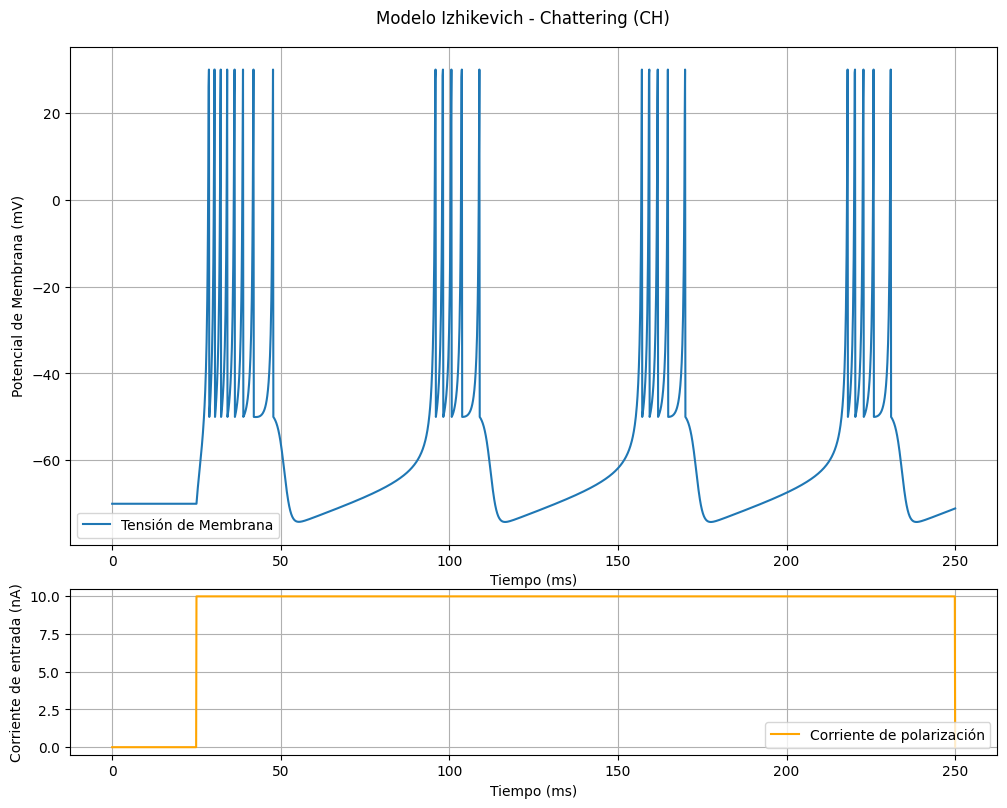

In [104]:
# Izhikevich neuron model Chattering (CH) parameters
I = I_values(initial_time, T, dt, kind='CH')
parameters = [0.02, 0.2, -50.0, 2.0, I, -70.0] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Chattering (CH)')

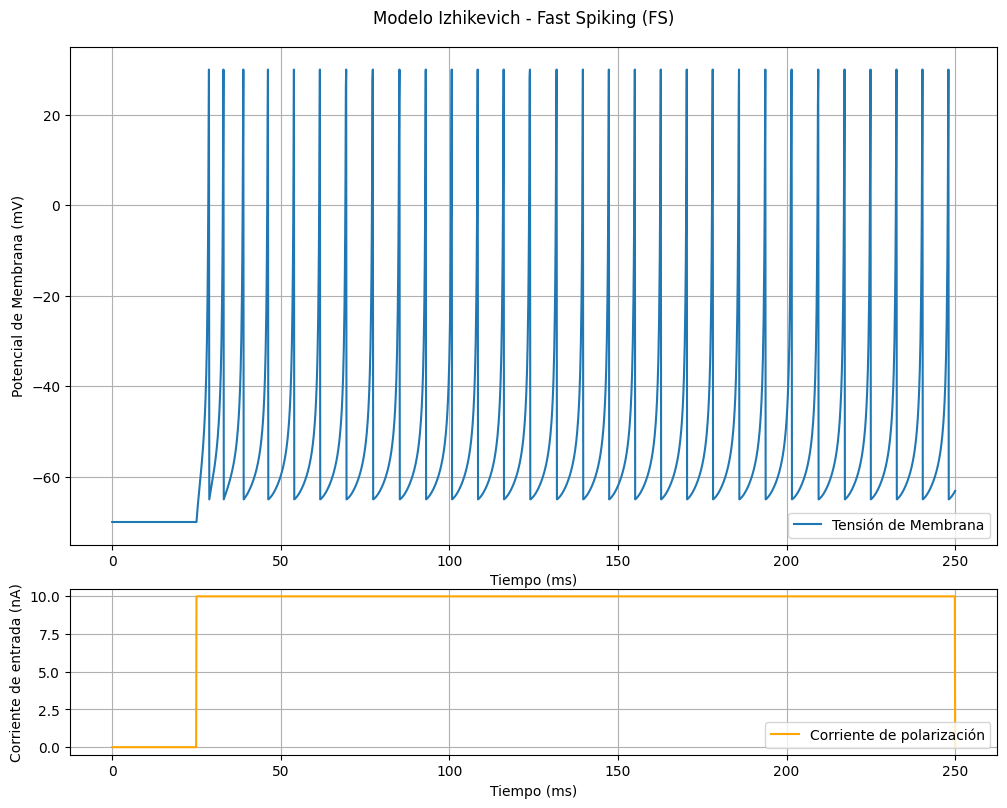

In [105]:
# Izhikevich neuron model Fast Spiking (FS) parameters
I = I_values(initial_time, T, dt, kind='FS')
parameters = [0.1, 0.2, -65.0, 2.0, I, -70.0] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Fast Spiking (FS)')

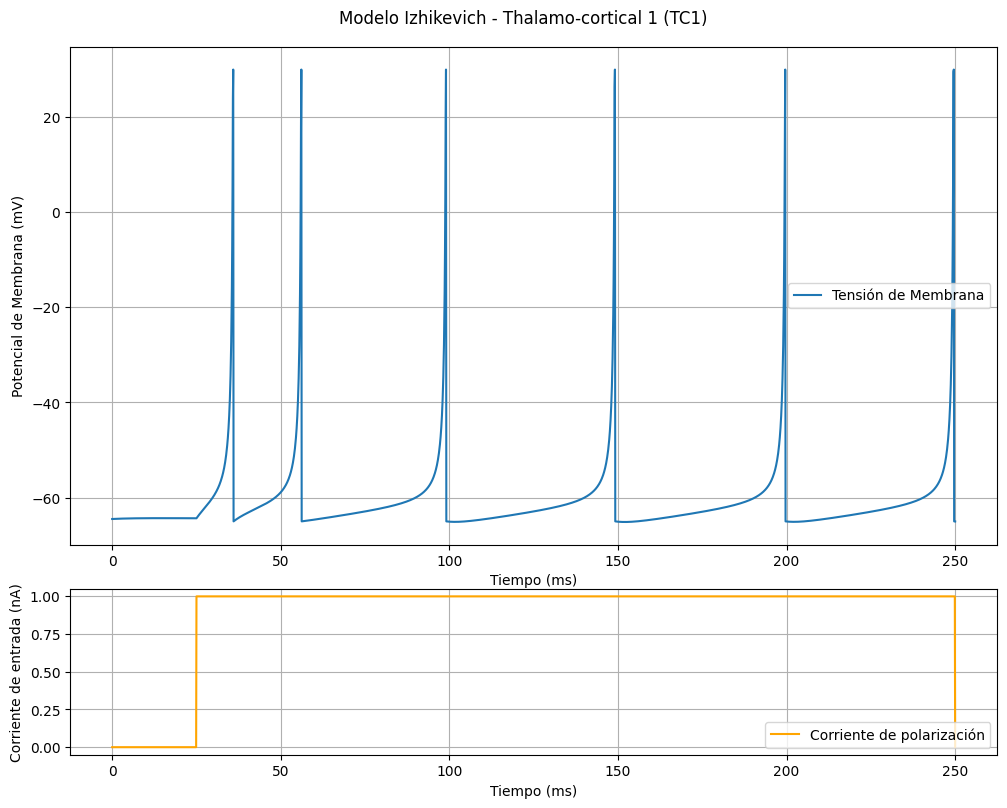

In [106]:
# Izhikevich neuron model Thalamo-cortical 1 (TC1) parameters
I = I_values(initial_time, T, dt, kind='TC1')
parameters = [0.02, 0.25, -65.0, 0.05, I, -64.5] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Thalamo-cortical 1 (TC1)')

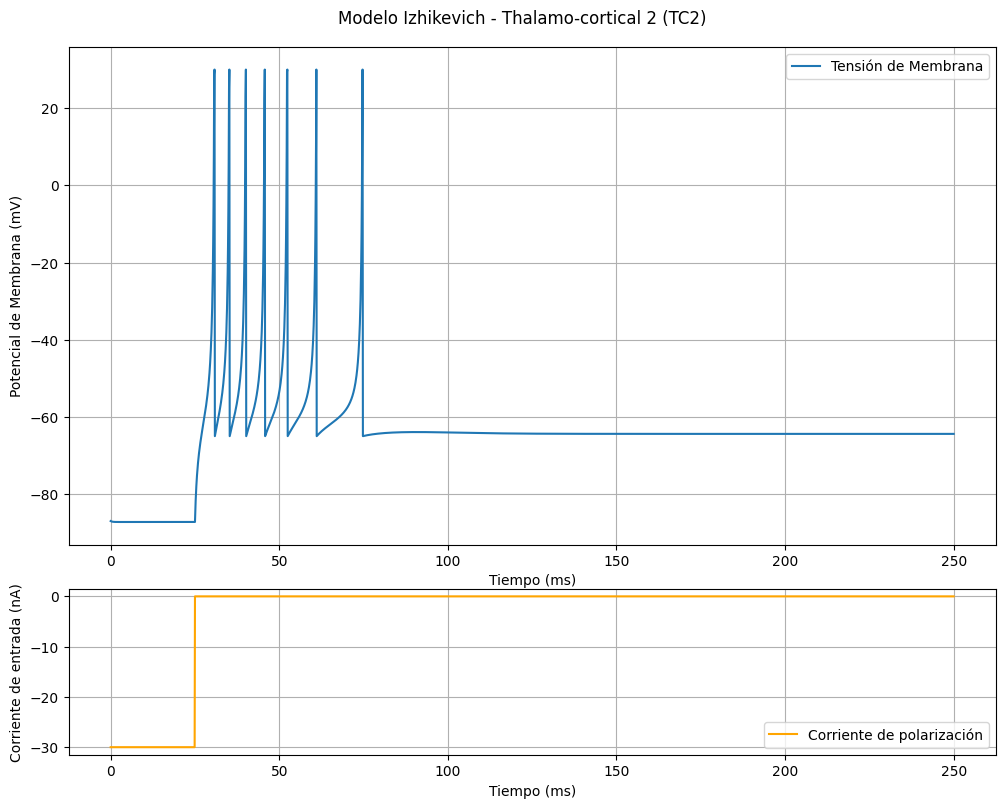

In [107]:
# Izhikevich neuron model Thalamo-cortical 2 (TC2) parameters
I = I_values(initial_time, T, dt, kind='TC2')
parameters = [0.02, 0.25, -65.0, 0.05, I, -87.0] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Thalamo-cortical 2 (TC2)')

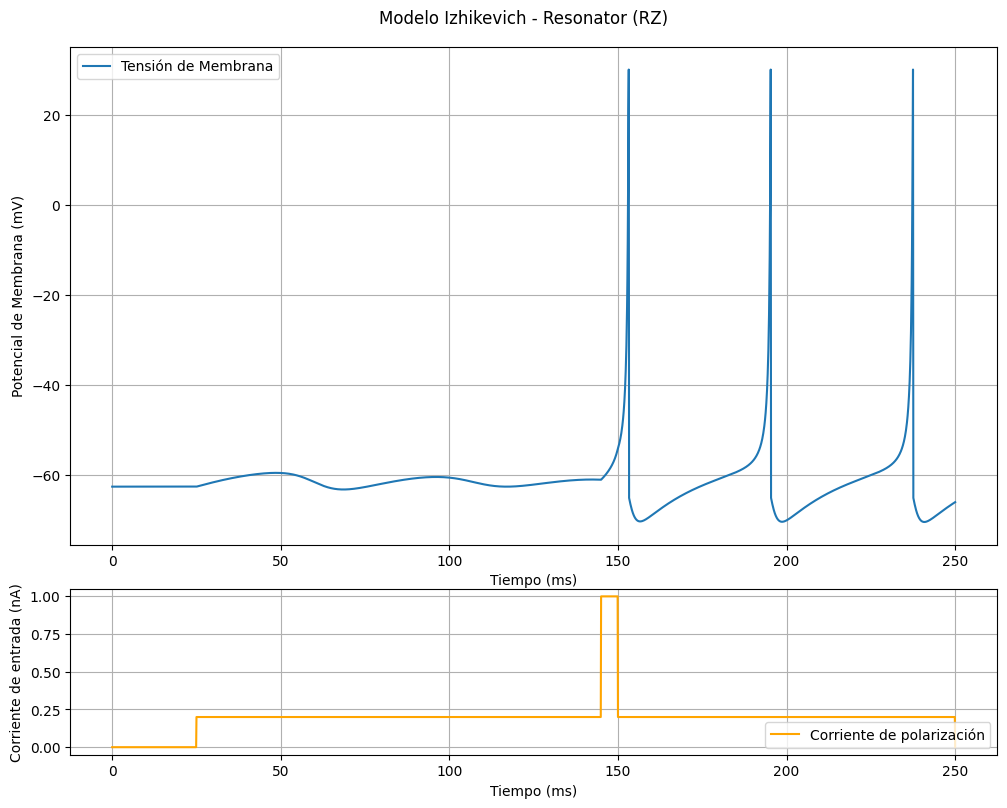

In [111]:
# Izhikevich neuron model Resonator (RZ) parameters
I = I_values(initial_time, T, dt, kind='RZ')
parameters = [0.1, 0.26, -65.0, 2.0, I, -62.5] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Resonator (RZ)')

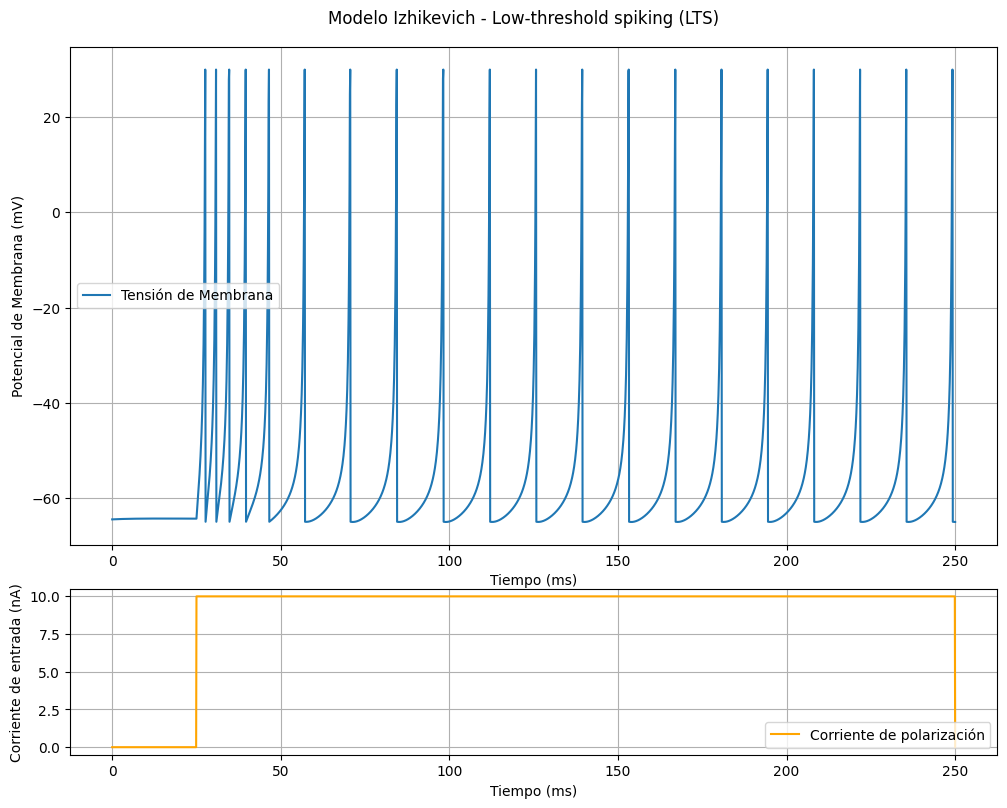

In [109]:
# Izhikevich neuron model Low-threshold spiking (LTS) parameters
I = I_values(initial_time, T, dt, kind='LTS')
parameters = [0.02, 0.25, -65.0, 2.0, I, -64.5] #[a,b,c,d,I,V0]
time, voltage_values = Izhikevich_Model(parameters)
plot_results(time, voltage_values, I, title='Modelo Izhikevich - Low-threshold spiking (LTS)')

# Network of 1000 randomly coupled spiking neurons

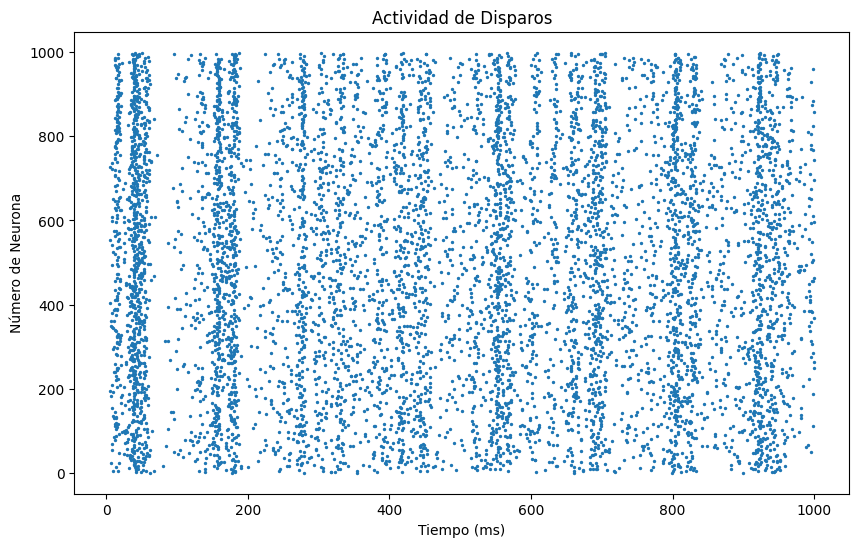

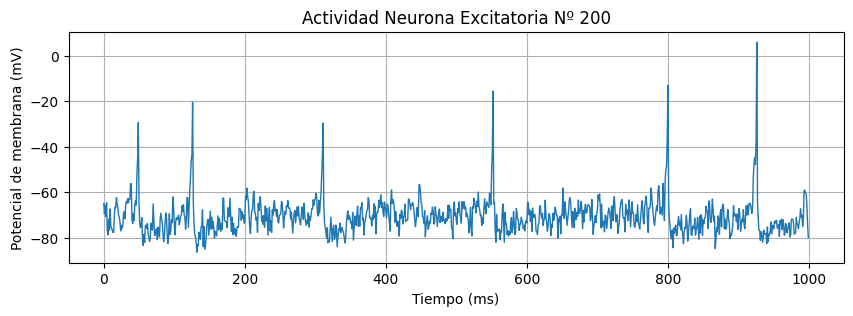

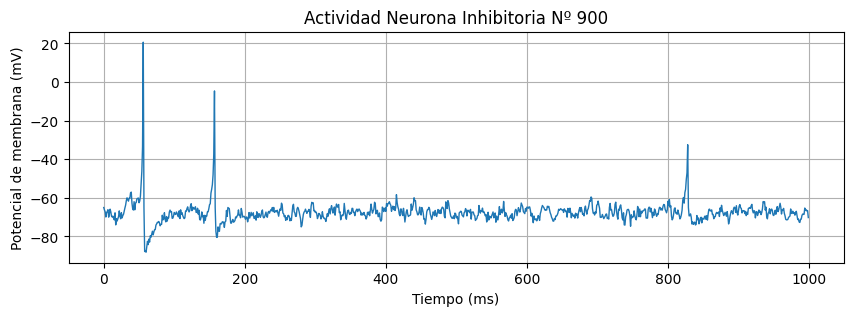

In [5]:
Ne = 800 #Excitatory neurons
Ni = 200 #Inhibitory neurons
re = np.random.rand(Ne)
ri = np.random.rand(Ni)

a = np.concatenate((0.02 * np.ones(Ne), 0.02 + 0.08 * ri))
b = np.concatenate((0.2 * np.ones(Ne), 0.25 - 0.05 * ri))
c = np.concatenate((-65 + 15 * re**2, -65 * np.ones(Ni)))
d = np.concatenate((8 - 6 * re**2, 2 * np.ones(Ni)))

S = np.hstack((0.5 * np.random.rand(Ne + Ni, Ne), -np.random.rand(Ne + Ni, Ni))) #sinaptic weights

v = -65 * np.ones(Ne + Ni) #initial values
u = b * v                  #initial values

voltage_traces = []        #per-neurons potential
firings = []               #Shooting time

for t in range(1, 1001):  # 1000 ms
    I = np.concatenate((5 * np.random.randn(Ne), 2 * np.random.randn(Ni)))
    
    fired = np.where(v >= 30)[0]
    firings.extend(list(zip(t + 0 * fired, fired)))
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]

    I = I + np.sum(S[:, fired], axis=1)
    
    voltage_traces.append(v.copy())
    v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)  
    u = u + a * (b * v - u)    

firings = np.array(firings)
voltage_traces = np.array(voltage_traces)

#Graphics
neurona_exitatoria = 200
neurona_inhibitoria = 900

plt.figure(figsize=(10,6))
plt.scatter(firings[:, 0], firings[:, 1], s=2.0)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Número de Neurona')
plt.title('Actividad de Disparos')

plt.figure(figsize=(10,3))
plt.plot(voltage_traces[:, neurona_exitatoria], c='tab:blue', linewidth=1.0)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana (mV)')
plt.title(f'Actividad Neurona Excitatoria Nº {neurona_exitatoria}')
plt.grid()

plt.figure(figsize=(10,3))
plt.plot(voltage_traces[:, neurona_inhibitoria], c='tab:blue', linewidth=1.0)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana (mV)')
plt.title(f'Actividad Neurona Inhibitoria Nº {neurona_inhibitoria}')
plt.grid()

plt.show()